In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Rainbow Six: Siege](https://rainbow6.ubisoft.com/siege/en-us/home/ "Rainbow Six Siege Homepage") is a [competitive](https://en.wikipedia.org/wiki/List_of_eSports_games "List of eSports Games on Wikipedia") team-based first person shooter created by [Ubisoft Montreal](https://twitter.com/UbisoftMTL "Ubisoft Montreal on Twitter").

In [2]:
df = pd.read_csv("../data/leaderboard-pages.csv").head(100)
print "{} rows".format(df.shape[0])
print "{} cols".format(df.shape[1])

100 rows
34 cols


In [3]:
df.head(1).T

,0
indexed_at,2017-04-14 22:29:04.201
platform,xone
stats.casual.deaths,24
stats.casual.has_played,True
stats.casual.kd,1.958
stats.casual.kills,47
stats.casual.losses,3
stats.casual.playtime,6766
stats.casual.wins,4
stats.casual.wlr,1.333


In [4]:
import sys
sys.path.append("../radarchart/")
from radarchart import RadarChart

In [ ]:

# radar = RadarChart(plt.figure(figsize=(6, 6)), ['A','B','C','D', 'E'])

In [5]:
radar = RadarChart(plt.figure(figsize=(6, 6)), ['A','B','C','D', 'E'])
radar.plot([1, 3, 2, 5, 4],  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot([2.3, 2, 3, 3, 2],"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot([3, 4, 3, 4, 2], "-", lw=2, color="g", alpha=0.4, label="third")

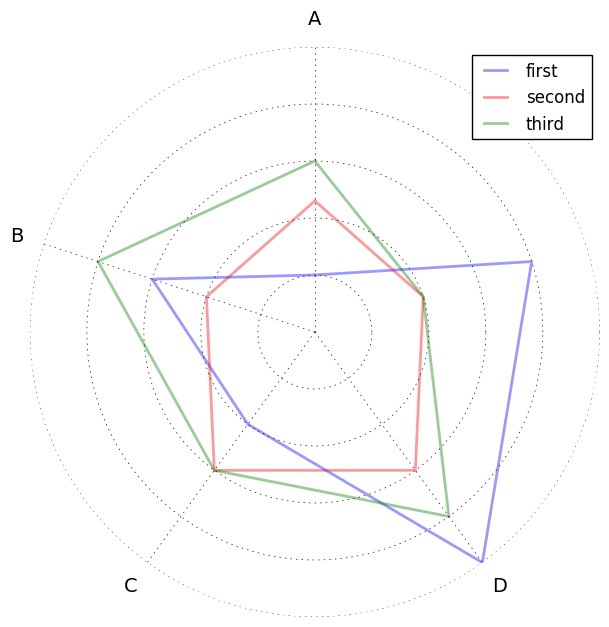

In [6]:
radar.show()

In [69]:
def get_stats_for(player, game_mode):
    cols = player.index.str.startswith('stats.{}'.format(game_mode)) \
         | player.index.str.startswith('stats.overall')
    return player[cols]

In [73]:
player = get_stats_for(df.ix[0], 'casual')
player

stats.casual.deaths                         24
stats.casual.has_played                   True
stats.casual.kd                          1.958
stats.casual.kills                          47
stats.casual.losses                          3
stats.casual.playtime                     6766
stats.casual.wins                            4
stats.casual.wlr                         1.333
stats.overall.assists                       87
stats.overall.barricades_built              82
stats.overall.bullets_fired              13876
stats.overall.bullets_hit                 2022
stats.overall.headshots                    107
stats.overall.melee_kills                    1
stats.overall.penetration_kills             16
stats.overall.reinforcements_deployed      141
stats.overall.revives                        8
stats.overall.steps_moved                52589
stats.overall.suicides                       5
Name: 0, dtype: object

In [20]:
def shots_fired(player):
    playtime = player['stats.casual.playtime'] + player['stats.ranked.playtime']
    stats_overall_assists = player['stats.overall.assists']
    stats_overall_barricades_built = player['stats.overall.barricades_built']
    stats_overall_bullets_fired = player['stats.overall.bullets_fired']
    stats_overall_bullets_hit = player['stats.overall.bullets_hit']
    stats_overall_headshots = player['stats.overall.headshots']
    stats_overall_melee_kills = player['stats.overall.melee_kills']
    stats_overall_penetration_kills = player['stats.overall.penetration_kills']
    stats_overall_reinforcements_deployed = player['stats.overall.reinforcements_deployed']
    stats_overall_revives = player['stats.overall.revives']
    stats_overall_steps_moved = player['stats.overall.steps_moved']
    stats_overall_suicides = player['stats.overall.suicides']
    return []

In [21]:
def add_prop(group, column):
    value = group[column].astype(float)
    group['prop_{}'.format(column)] = value / value.sum()
    return group

In [22]:
def select_stats_for(frame, platform, game_mode):
    stats_columns = frame.columns[
        (frame.columns.str.startswith("stats.{}".format(game_mode))) &
        (frame.columns != "stats.{}.playtime".format(game_mode)) &
        (frame.columns != "stats.{}.has_played".format(game_mode))
    ]
    return frame.ix[frame['platform'] == platform, stats_columns]

In [23]:
ps4_ranked_stats = select_stats_for(df, 'ps4', 'ranked')
ps4_ranked_playtime = df.ix[ps4_ranked_stats.index, ['stats.ranked.playtime']]

In [32]:
ps4_ranked_stats.head()

,stats.ranked.deaths,stats.ranked.kd,stats.ranked.kills,stats.ranked.losses,stats.ranked.wins,stats.ranked.wlr
0,1956,0.964,1885,219,280,1.279
1,801,1.306,1046,70,124,1.771
2,1031,0.911,939,118,127,1.076
3,1836,0.981,1801,179,204,1.140
4,368,1.120,412,32,60,1.875


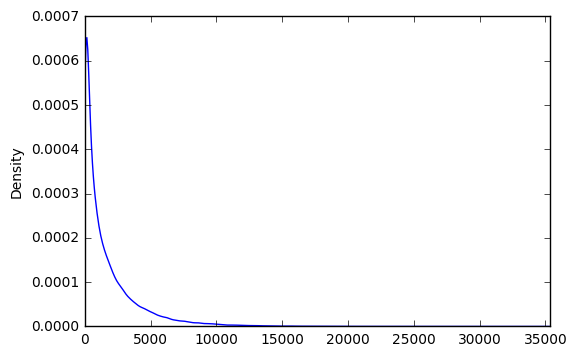

In [87]:
xmin = ps4_ranked_stats['stats.ranked.kills'].min()
xmax = ps4_ranked_stats['stats.ranked.kills'].max()
ps4_ranked_stats['stats.ranked.kills'].plot(kind='density', xlim=(xmin, xmax))
plt.show()

In [39]:
from sklearn import preprocessing

Index([u'stats.ranked.deaths.norm', u'stats.ranked.kd.norm',
       u'stats.ranked.kills.norm', u'stats.ranked.losses.norm',
       u'stats.ranked.wins.norm', u'stats.ranked.wlr.norm'],
      dtype='object')

In [50]:
def normalize_dataframe(frame, sep="."):
    values = preprocessing.normalize(frame, axis=0)
    columns = frame.columns + sep + "norm"
    return pd.DataFrame(values, columns=columns)

In [58]:
ps4_ranked_stats_norm = normalize_dataframe(ps4_ranked_stats)
ps4_ranked_stats_norm.head()

,stats.ranked.deaths.norm,stats.ranked.kd.norm,stats.ranked.kills.norm,stats.ranked.losses.norm,stats.ranked.wins.norm,stats.ranked.wlr.norm
0,0.001329,0.001535,0.001134,0.001393,0.001394,0.001072
1,0.000544,0.002079,0.000629,0.000445,0.000617,0.001484
2,0.000701,0.001450,0.000565,0.000750,0.000632,0.000902
3,0.001248,0.001562,0.001084,0.001138,0.001016,0.000955
4,0.000250,0.001783,0.000248,0.000203,0.000299,0.001571


In [57]:
ps4_ranked_playtime_norm = normalize_dataframe(ps4_ranked_playtime)
ps4_ranked_playtime_norm.head()

,stats.ranked.playtime.norm
0,0.001327
1,0.000533
2,0.000637
3,0.001003
4,0.000251


In [64]:
ps4_ranked_stats_norm['stats.ranked.kills.norm'].describe()

count    327015.000000
mean          0.001037
std           0.001408
min           0.000000
25%           0.000128
50%           0.000511
75%           0.001388
max           0.021261
Name: stats.ranked.kills.norm, dtype: float64

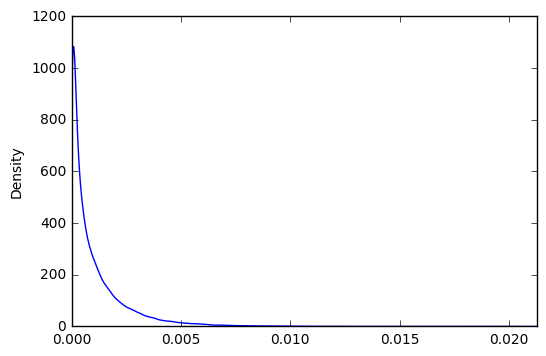

In [86]:
xmin = ps4_ranked_stats_norm['stats.ranked.kills.norm'].min()
xmax = ps4_ranked_stats_norm['stats.ranked.kills.norm'].max()
ps4_ranked_stats_norm['stats.ranked.kills.norm'].plot(kind='density', xlim=(xmin, xmax))
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [89]:
lm = LinearRegression()

In [98]:
from sklearn.model_selection import train_test_split

In [152]:
X = ps4_ranked_stats_norm['stats.ranked.kills.norm'].values
y = ps4_ranked_playtime_norm['stats.ranked.playtime.norm'].values

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [169]:
lm.fit(y_train, X_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

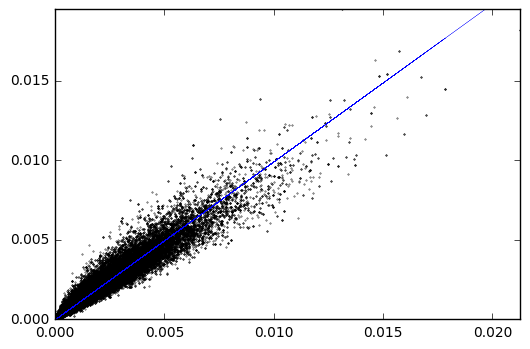

In [170]:
xmin = X_test.min()
xmax = X_test.max()
ymin = y_test.min()
ymax = y_test.max()

plt.clf()
plt.scatter(X_test, y_test,  color='black', s=0.1)
plt.plot(X_test, lm.predict(X_test), color='blue', linewidth=0.1)
plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))
plt.show()